In [0]:
from google.colab import drive
drive.mount('/content/drive')

## 26. 強調マークアップの除去
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）．

In [0]:
import gzip
import json
import re

def get_uk_data(wiki_data):
    for i in wiki_data:
        title = json.loads(i)["title"]
        if title == "イギリス":
            return json.loads(i)["text"]
        
def is_invalid_word(target_data):
    if " " not in target_data or "=" not in target_data:
        return False
    elif "基礎情報" in target_data:
        return False
    return True
    
def to_dict(sentence):
    d = {}
    for data in sentence.split("\n"):
        if data == "}}":
            break
        if not is_invalid_word(data):
            continue
        key = data.split("=")[0].replace("|", "").strip()
        val = re.sub("'", "", data.split("=")[1]).strip()
        d[key] = val
    return d
            
with gzip.open("/content/drive/My Drive/jawiki-country.json.gz", mode="rt") as f:
    wiki_data = f.readlines()
uk_data = get_uk_data(wiki_data)
dict_data = to_dict(uk_data)
dict_data

{'GDP/人': '36,727<ref name',
 'GDP値': '2兆3162億<ref name',
 'GDP値MER': '2兆4337億<ref name',
 'GDP値元': '1兆5478億<ref name',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '[[.uk]] / [[.gb]]<ref>使用は.ukに比べ圧倒的少数。</ref>',
 '人口値': '63,181,775<ref>[http://esa.un.org/unpd/wpp/Excel-Data/population.htm United Nations Department of Economic and Social Affairs>Population Division>Data>Population>Total Population]</ref>',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': '[[エリザベス2世]]',
 '元首等肩書': '[[イギリスの君主|女王]]',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br/>',
 '公用語': '[[英語]]（事実上）',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国歌': '[[女王陛下万歳|神よ女王陛下を守り給え]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国際電話番号': '44',
 '夏時間': '+1',
 '建国形

## 27. 内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

In [0]:
import gzip
import json
import re

def get_uk_data(wiki_data):
    for i in wiki_data:
        title = json.loads(i)["title"]
        if title == "イギリス":
            return json.loads(i)["text"]
        
def is_invalid_word(target_data):
    if " " not in target_data or "=" not in target_data:
        return False
    elif "基礎情報" in target_data:
        return False
    return True
    
def to_dict(sentence):
    d = {}
    for data in sentence.split("\n"):
        if data == "}}":
            break
        if not is_invalid_word(data):
            continue
        key = data.split("=")[0].replace("|", "").strip()
        val = re.sub("'|\[\[|\]\]", "", data.split("=")[1]).split("<ref")[0].strip()
        d[key] = val
    return d
            
with gzip.open("/content/drive/My Drive/jawiki-country.json.gz", mode="rt") as f:
    wiki_data = f.readlines()
uk_data = get_uk_data(wiki_data)
dict_data = to_dict(uk_data)
dict_data

{'GDP/人': '36,727',
 'GDP値': '2兆3162億',
 'GDP値MER': '2兆4337億',
 'GDP値元': '1兆5478億',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '.uk / .gb',
 '人口値': '63,181,775',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': 'エリザベス2世',
 '元首等肩書': 'イギリスの君主|女王',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}',
 '公用語': '英語（事実上）',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国歌': '女王陛下万歳|神よ女王陛下を守り給え',
 '国章リンク': '（イギリスの国章|国章）',
 '国章画像': 'ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章',
 '国際電話番号': '44',
 '夏時間': '+1',
 '建国形態': '建国',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '時間帯': '±0',
 '最大都市': 'ロンドン',
 '標語': '{{lang|fr|Dieu et mon droit}}<br/>（フランス語:神と私の権利）',
 '水面積率': '1.3%',
 '注記': '',
 '略名': 'イギリス',
 '確立年月日1': '927年／843年',
 '確立年月日2': '1707年',
 '確立年月日3': '1801年',
 '確立年月日4': '1927年',
 '確立形態1': 'イングランド王国／スコットランド王

## 28. MediaWikiマークアップの除去
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [0]:
import gzip
import json
import re

def get_uk_data(wiki_data):
    for i in wiki_data:
        title = json.loads(i)["title"]
        if title == "イギリス":
            return json.loads(i)["text"]
        
def is_invalid_word(target_data):
    if " " not in target_data or "=" not in target_data:
        return False
    elif "基礎情報" in target_data:
        return False
    return True
    
def to_dict(sentence):
    d = {}
    for data in sentence.split("\n"):
        if data == "}}":
            break
        if not is_invalid_word(data):
            continue
        key = data.split("=")[0].replace("|", "").strip()
        val = re.sub("'|\[\[|\]\]", "", data.split("=")[1]).split("<ref")[0].strip()
        val = re.sub("<br.*>", "", val)
        if "{{" in val:
            val = re.sub("\{\{|\}\}", "", val).split("|")[-1]
        if "ファイル:" in val:
            val = val.replace("ファイル:", "")[1].split("|")[0]
        d[key] = val
    return d
            
with gzip.open("/content/drive/My Drive/jawiki-country.json.gz", mode="rt") as f:
    wiki_data = f.readlines()
uk_data = get_uk_data(wiki_data)
dict_data = to_dict(uk_data)
dict_data

{'GDP/人': '36,727',
 'GDP値': '2兆3162億',
 'GDP値MER': '2兆4337億',
 'GDP値元': '1兆5478億',
 'GDP統計年': '2012',
 'GDP統計年MER': '2012',
 'GDP統計年元': '2012',
 'GDP順位': '6',
 'GDP順位MER': '5',
 'ISO 3166-1': 'GB / GBR',
 'ccTLD': '.uk / .gb',
 '人口値': '63,181,775',
 '人口大きさ': '1 E7',
 '人口密度値': '246',
 '人口統計年': '2011',
 '人口順位': '22',
 '位置画像': 'Location_UK_EU_Europe_001.svg',
 '元首等氏名': 'エリザベス2世',
 '元首等肩書': 'イギリスの君主|女王',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland',
 '公用語': '英語（事実上）',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国歌': '女王陛下万歳|神よ女王陛下を守り給え',
 '国章リンク': '（イギリスの国章|国章）',
 '国章画像': 'o',
 '国際電話番号': '44',
 '夏時間': '+1',
 '建国形態': '建国',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '時間帯': '±0',
 '最大都市': 'ロンドン',
 '標語': 'Dieu et mon droit（フランス語:神と私の権利）',
 '水面積率': '1.3%',
 '注記': '',
 '略名': 'イギリス',
 '確立年月日1': '927年／843年',
 '確立年月日2': '1707年',
 '確立年月日3': '1801年',
 '確立年月日4': '1927年',
 '確立形態1': 'イングランド王国／スコットランド王国（両国とも連合法 (1707年)|1707年連合法まで）',
 '確立形態2': 'グレートブリテン王国建国（連合法 (1707年)|1707年連合法）',
 '確立形態3': 

## 29. 国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

In [0]:
import requests

import gzip
import json
import re
import time

def get_uk_data(wiki_data):
    for i in wiki_data:
        title = json.loads(i)["title"]
        if title == "イギリス":
            return json.loads(i)["text"]
        
def is_invalid_word(target_data):
    if " " not in target_data or "=" not in target_data:
        return False
    elif "基礎情報" in target_data:
        return False
    return True
    
def to_dict(sentence):
    d = {}
    for data in sentence.split("\n"):
        if data == "}}":
            break
        if not is_invalid_word(data):
            continue
        key = data.split("=")[0].replace("|", "").strip()
        val = re.sub("'|\[\[|\]\]", "", data.split("=")[1]).split("<ref")[0].strip()
        val = re.sub("<br.*>", "", val)
        if "{{" in val:
            val = re.sub("\{\{|\}\}", "", val).split("|")[-1]
        if "ファイル:" in val:
            val = val.replace("ファイル:", "")[1].split("|")[0]
        d[key] = val
    return d
            
def request_to_wiki(image_file_name):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
    "action":"query",
    "format":"json",
    "prop": "imageinfo",
    "titles":"File:{}".format(image_file_name),
    "iiprop": "url",
    }
    header = {
        "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A",
        "Content-Type": "application/json"
    }
    time.sleep(3)
    return requests.get(url, headers=header, params=params)

def get_national_flag(image_file_name):
    try:
        req = request_to_wiki(image_file_name)
        if req.status_code != 200:
            raise Exception("Wiki APIへのリクエストが失敗しました")
        return req.json()["query"]["pages"]["23473560"]['imageinfo'][0]['url']
    except:
        raise

with gzip.open("/content/drive/My Drive/jawiki-country.json.gz", mode="rt") as f:
    wiki_data = f.readlines()
uk_data = get_uk_data(wiki_data)
dict_data = to_dict(uk_data)
national_flag_url = get_national_flag(dict_data["国旗画像"])
print(national_flag_url)

https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg


# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [0]:
!apt install mecab
!apt install libmecab-dev
!apt install mecab-ipadic-utf8

!git clone https://github.com/neologd/mecab-ipadic-neologd.git
!cd mecab-ipadic-neologd && bin/install-mecab-ipadic-neologd
!echo "; dicdir = /var/lib/mecab/dic/debian \ndicdir = /usr/lib/mecab/dic/mecab-ipadic-neologd" > /etc/mecabrc

!apt-get install mecab mecab-ipadic-utf8 libmecab-dev swig
!pip install mecab-python3

In [0]:
import codecs

import MeCab

with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt", "r", "utf-8") as f:
    neko_data = f.read()
 
t = MeCab.Tagger('')
with codecs.open("neko.txt.mecab", "w", "utf-8") as out_f:
    out_f.write(t.parse(neko_data))

In [89]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    
analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

sentence_list = analyzer.to_sentence_list(result)
print(sentence_list[0])

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'で', 'pos': '接続詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '連体詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [99]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    

analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

verb_list = analyzer.get_morpheme(result, "pos", "動詞")
print(verb_list[0])

{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [96]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

verb_list = analyzer.get_morpheme(result, "pos", "動詞")
verb_base_list = analyzer.get_morpheme_data(verb_list, "base")
print(verb_base_list[0])

つく


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [103]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

noun = analyzer.get_morpheme(result, "pos1", "サ変接続")
noun[0]

{'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続', 'surface': '見当'}

## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [105]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

noun_phrase = analyzer.get_noun_phrase(result)
noun_phrase[0]

'彼の掌'

## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [115]:
import codecs

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        
    def get_most_continuous_morpheme_data(self, morpheme_list, target_morpheme, target_data):
        cnt = 0
        result_word = {}
        tmp_word = ""
        for  morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                cnt += 1
                tmp_word += morpheme["surface"]
            else:
                if cnt <= 0:
                    continue
                if cnt in result_word:
                    result_word[cnt].append(tmp_word)
                else:
                    result_word[cnt] = [tmp_word]
                cnt = 0
                tmp_word = ""
        return result_word[max(result_word.keys())]


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

most_continuous_words = analyzer.get_most_continuous_morpheme_data(result, "pos", "名詞")
most_continuous_words

["manyaslip'twixtthecupandthelip", '明治三十八年何月何日戸締り']

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
import codecs
import collections

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        
    def get_most_continuous_morpheme_data(self, morpheme_list, target_morpheme, target_data):
        cnt = 0
        result_word = {}
        tmp_word = ""
        for  morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                cnt += 1
                tmp_word += morpheme["surface"]
            else:
                if cnt <= 0:
                    continue
                if cnt in result_word:
                    result_word[cnt].append(tmp_word)
                else:
                    result_word[cnt] = [tmp_word]
                cnt = 0
                tmp_word = ""
        return result_word[max(result_word.keys())]

    def mapping_word_flequency(self, morpheme_list):
        return collections.Counter([x["surface"] for x in morpheme_list])


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

most_continuous_words = analyzer.mapping_word_flequency(result)
most_continuous_words.most_common()[:5]

[('の', 9195), ('。', 7486), ('て', 6873), ('、', 6772), ('は', 6430)]

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

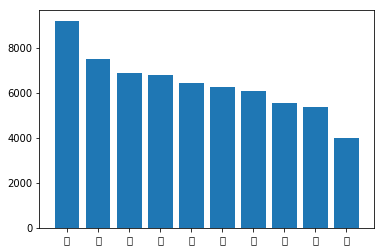

In [18]:
import codecs
import collections
from matplotlib import pyplot as plt
import numpy as np

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        
    def get_most_continuous_morpheme_data(self, morpheme_list, target_morpheme, target_data):
        cnt = 0
        result_word = {}
        tmp_word = ""
        for  morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                cnt += 1
                tmp_word += morpheme["surface"]
            else:
                if cnt <= 0:
                    continue
                if cnt in result_word:
                    result_word[cnt].append(tmp_word)
                else:
                    result_word[cnt] = [tmp_word]
                cnt = 0
                tmp_word = ""
        return result_word[max(result_word.keys())]

    def mapping_word_flequency(self, morpheme_list):
        return collections.Counter([x["surface"] for x in morpheme_list])


class GraphCreator:

    def create_bar_graph(self, data):
        fig, ax = plt.subplots()
        ax.bar(np.arange(1, len(data) + 1), [y[1] for y in data], tick_label=[x[0] for x in data])
        return plt


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

most_continuous_words = analyzer.mapping_word_flequency(result)
graph_creator = GraphCreator()
graph_creator.create_bar_graph(most_continuous_words.most_common()[:10]).show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


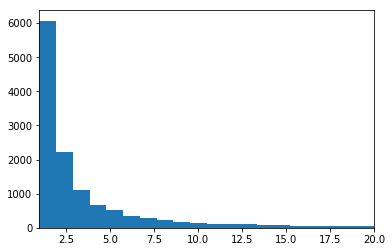

In [38]:
import codecs
import collections
from matplotlib import pyplot as plt
import numpy as np

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        
    def get_most_continuous_morpheme_data(self, morpheme_list, target_morpheme, target_data):
        cnt = 0
        result_word = {}
        tmp_word = ""
        for  morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                cnt += 1
                tmp_word += morpheme["surface"]
            else:
                if cnt <= 0:
                    continue
                if cnt in result_word:
                    result_word[cnt].append(tmp_word)
                else:
                    result_word[cnt] = [tmp_word]
                cnt = 0
                tmp_word = ""
        return result_word[max(result_word.keys())]

    def mapping_word_flequency(self, morpheme_list):
        return collections.Counter([x["surface"] for x in morpheme_list])


class GraphCreator:

    def create_bar_graph(self, data):
        fig, ax = plt.subplots()
        ax.bar(np.arange(1, len(data) + 1), [y[1] for y in data], tick_label=[x[0] for x in data])
        return plt

    def create_histogram(self, data):
        fig, ax = plt.subplots()
        plt.xlim(xmin=1, xmax=20)
        n, bins, patches = ax.hist([y[1] for y in data], bins=20, range=(1,20))
        return plt


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

most_continuous_words = analyzer.mapping_word_flequency(result)
graph_creator = GraphCreator()
graph_creator.create_histogram(most_continuous_words.most_common()).show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [0]:
import codecs
import collections
from matplotlib import pyplot as plt
import numpy as np

import MeCab


class MeCabAnalyzer:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,原形,読み,発音 
# 一	名詞,数,*,*,*,*,一,イチ,イチ
    def __init__(self):
        self.tagger = MeCab.Tagger("")
    
    def morpheme_to_dict(self, doc):
        morphemes = doc.splitlines()[0].split(",")
        return {"surface": morphemes[0].split("\t")[0],
                "base": morphemes[6],
                "pos": morphemes[0].split("\t")[1],
                "pos1": morphemes[1],
        }

    def parser(self, doc):
        return self.tagger.parse(doc)

    def to_sentence_list(self, morpheme_list):
        result = []
        sentence = []
        for morpheme in morpheme_list:
            sentence.append(morpheme)
            if morpheme["pos1"] == "句点":
                result.append(sentence)
                sentence = []
        return result

    def get_morpheme(self, morpheme_list, target_morpheme, target_data):
        result = []
        for morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                result.append(morpheme)
        return result
    
    def get_morpheme_data(self, morpheme_list, target_morpheme):
        result = []
        for morpheme in morpheme_list:
            result.append(morpheme[target_morpheme])
        return result
    
    def get_noun_phrase(self, morpheme_list):
        result = []
        for ind, morpheme in enumerate(morpheme_list):
            if morpheme["pos"] == "名詞" and morpheme_list[ind + 1]["surface"] == "の" \
                and morpheme_list[ind + 2]["pos"] == "名詞":
                result.append(
                    morpheme["surface"] \
                    + morpheme_list[ind + 1]["surface"] \
                    + morpheme_list[ind + 2]["surface"]
                )
        return result
        
    def get_most_continuous_morpheme_data(self, morpheme_list, target_morpheme, target_data):
        cnt = 0
        result_word = {}
        tmp_word = ""
        for  morpheme in morpheme_list:
            if morpheme[target_morpheme] == target_data:
                cnt += 1
                tmp_word += morpheme["surface"]
            else:
                if cnt <= 0:
                    continue
                if cnt in result_word:
                    result_word[cnt].append(tmp_word)
                else:
                    result_word[cnt] = [tmp_word]
                cnt = 0
                tmp_word = ""
        return result_word[max(result_word.keys())]

    def mapping_word_flequency(self, morpheme_list):
        return collections.Counter([x["surface"] for x in morpheme_list])


class GraphCreator:

    def create_bar_graph(self, data):
        fig, ax = plt.subplots()
        ax.bar(np.arange(1, len(data) + 1), [y[1] for y in data], tick_label=[x[0] for x in data])
        return plt

    def create_histogram(self, data):
        fig, ax = plt.subplots()
        plt.xlim(xmin=1, xmax=20)
        n, bins, patches = ax.hist([y[1] for y in data], bins=20, range=(1,20))
        return plt


analyzer = MeCabAnalyzer()
with codecs.open("/content/drive/My Drive/Colab Notebooks/Python100本ノック/neko.txt.mecab", "r", "utf-8") as f:
    node = analyzer.parser(f.readline())
    result = []
    while node:
        if len(node.split("\n")) <= 3:
            break
        result.append(analyzer.morpheme_to_dict(node))
        node = analyzer.parser(f.readline())

most_continuous_words = analyzer.mapping_word_flequency(result)
graph_creator = GraphCreator()
graph_creator.create_histogram(most_continuous_words.most_common()).show()